In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import smtplib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px


In [106]:
data = pd.read_csv(r"C:\Users\soham\Downloads\healthcare_dataset.csv",index_col='Discharge Date',parse_dates=['Discharge Date'] )
data.head()

Name  Age  Gender Blood Type Medical Condition  \
Discharge Date                                                            
2024-02-02      Bobby JacksOn   30    Male         B-            Cancer   
2019-08-26       LesLie TErRy   62    Male         A+           Obesity   
2022-10-07        DaNnY sMitH   76  Female         A-           Obesity   
2020-12-18       andrEw waTtS   28  Female         O+          Diabetes   
2022-10-09      adrIENNE bEll   43  Female        AB+            Cancer   

               Date of Admission            Doctor  \
Discharge Date                                       
2024-02-02            2024-01-31     Matthew Smith   
2019-08-26            2019-08-20   Samantha Davies   
2022-10-07            2022-09-22  Tiffany Mitchell   
2020-12-18            2020-11-18       Kevin Wells   
2022-10-09            2022-09-19    Kathleen Hanna   

                                  Hospital Insurance Provider  Billing Amount  \
Discharge Date                                                                  
2024-02-02                 Sons and Miller         Blue Cross    18856.281306   
2019-08-26                         Kim Inc           Medicare    33643.327287   
2022-10-07                        Cook PLC              Aetna    27955.096079   
2020-12-18      Hernandez Rogers and Vang,           Medicare    37909.782410   
2022-10-09                     White-White              Aetna    14238.317814   

                Room Number Admission Type   Medication  Test Results  
Discharge Date                                                         
2024-02-02              328         Urgent  Paracetamol        Normal  
2019-08-26              265      Emergency    Ibuprofen  Inconclusive  
2022-10-07              205      Emergency      Aspirin        Normal  
2020-12-18              450       Elective    Ibuprofen      Abnormal  
2022-10-09              458         Urgent   Penicillin      Abnormal

In [107]:
data['Name'] = data['Name'].str.lower()

In [108]:
data['Billing Amount'] = data['Billing Amount'].astype(int)
data.head()

Name  Age  Gender Blood Type Medical Condition  \
Discharge Date                                                            
2024-02-02      bobby jackson   30    Male         B-            Cancer   
2019-08-26       leslie terry   62    Male         A+           Obesity   
2022-10-07        danny smith   76  Female         A-           Obesity   
2020-12-18       andrew watts   28  Female         O+          Diabetes   
2022-10-09      adrienne bell   43  Female        AB+            Cancer   

               Date of Admission            Doctor  \
Discharge Date                                       
2024-02-02            2024-01-31     Matthew Smith   
2019-08-26            2019-08-20   Samantha Davies   
2022-10-07            2022-09-22  Tiffany Mitchell   
2020-12-18            2020-11-18       Kevin Wells   
2022-10-09            2022-09-19    Kathleen Hanna   

                                  Hospital Insurance Provider  Billing Amount  \
Discharge Date                                                                  
2024-02-02                 Sons and Miller         Blue Cross           18856   
2019-08-26                         Kim Inc           Medicare           33643   
2022-10-07                        Cook PLC              Aetna           27955   
2020-12-18      Hernandez Rogers and Vang,           Medicare           37909   
2022-10-09                     White-White              Aetna           14238   

                Room Number Admission Type   Medication  Test Results  
Discharge Date                                                         
2024-02-02              328         Urgent  Paracetamol        Normal  
2019-08-26              265      Emergency    Ibuprofen  Inconclusive  
2022-10-07              205      Emergency      Aspirin        Normal  
2020-12-18              450       Elective    Ibuprofen      Abnormal  
2022-10-09              458         Urgent   Penicillin      Abnormal

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55500 entries, 2024-02-02 to 2024-04-29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                55500 non-null  object
 1   Age                 55500 non-null  int64 
 2   Gender              55500 non-null  object
 3   Blood Type          55500 non-null  object
 4   Medical Condition   55500 non-null  object
 5   Date of Admission   55500 non-null  object
 6   Doctor              55500 non-null  object
 7   Hospital            55500 non-null  object
 8   Insurance Provider  55500 non-null  object
 9   Billing Amount      55500 non-null  int32 
 10  Room Number         55500 non-null  int64 
 11  Admission Type      55500 non-null  object
 12  Medication          55500 non-null  object
 13  Test Results        55500 non-null  object
dtypes: int32(1), int64(2), object(11)
memory usage: 6.1+ MB


In [110]:
data.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25538.818613    301.134829
std       19.602454    14211.448952    115.243069
min       13.000000    -2008.000000    101.000000
25%       35.000000    13240.750000    202.000000
50%       52.000000    25537.500000    302.000000
75%       68.000000    37820.000000    401.000000
max       89.000000    52764.000000    500.000000

In [111]:
data.describe(include= "object").T

count unique               top   freq
Name                55500  40235  michael williams     24
Gender              55500      2              Male  27774
Blood Type          55500      8                A-   6969
Medical Condition   55500      6         Arthritis   9308
Date of Admission   55500   1827        2024-03-16     50
Doctor              55500  40341     Michael Smith     27
Hospital            55500  39876         LLC Smith     44
Insurance Provider  55500      5             Cigna  11249
Admission Type      55500      3          Elective  18655
Medication          55500      5           Lipitor  11140
Test Results        55500      3          Abnormal  18627

In [112]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])

In [113]:
data['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [114]:
data['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [115]:
data['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [116]:
data['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [117]:
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [118]:
data['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [119]:
data['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

In [120]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

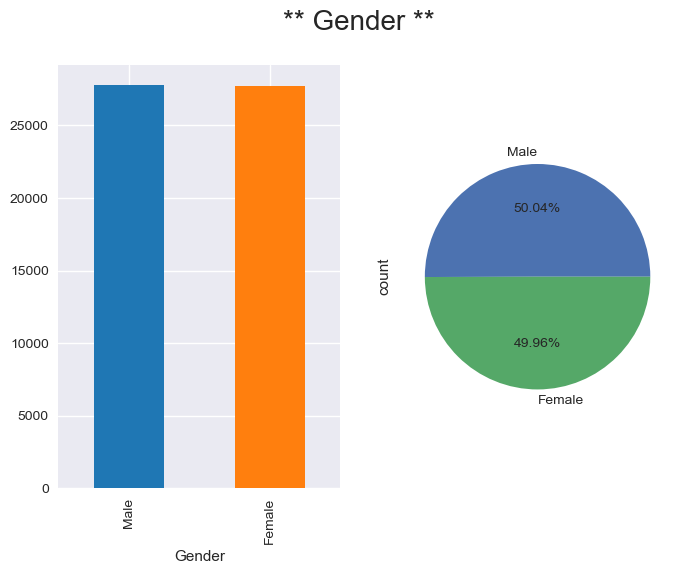

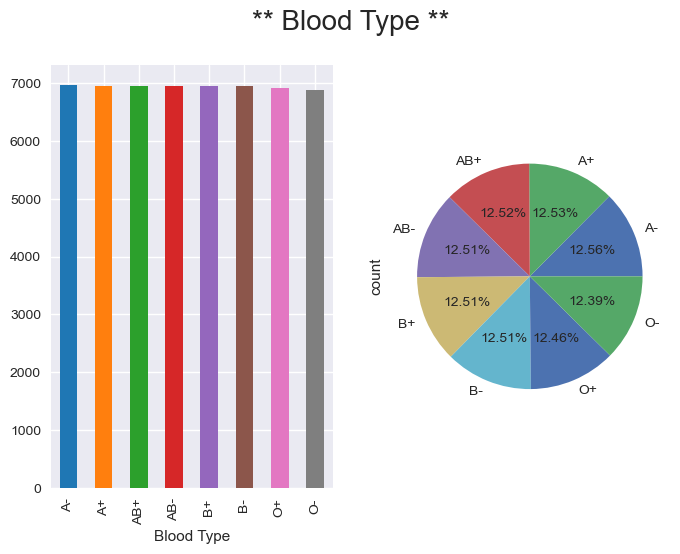

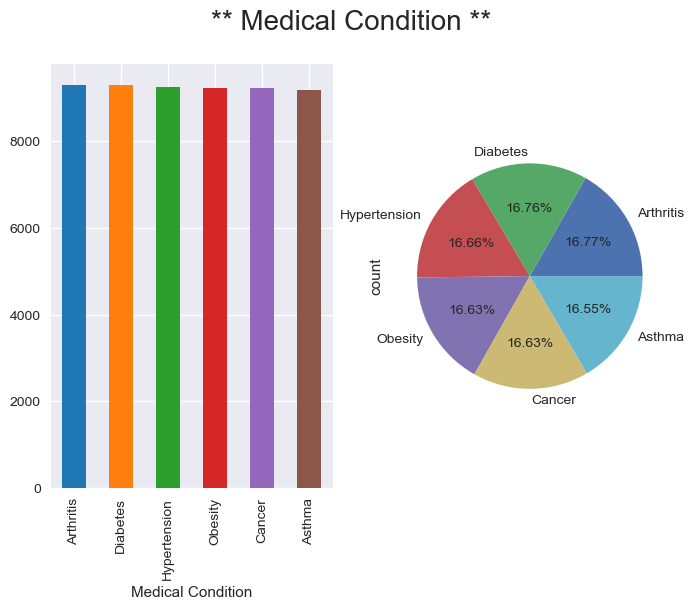

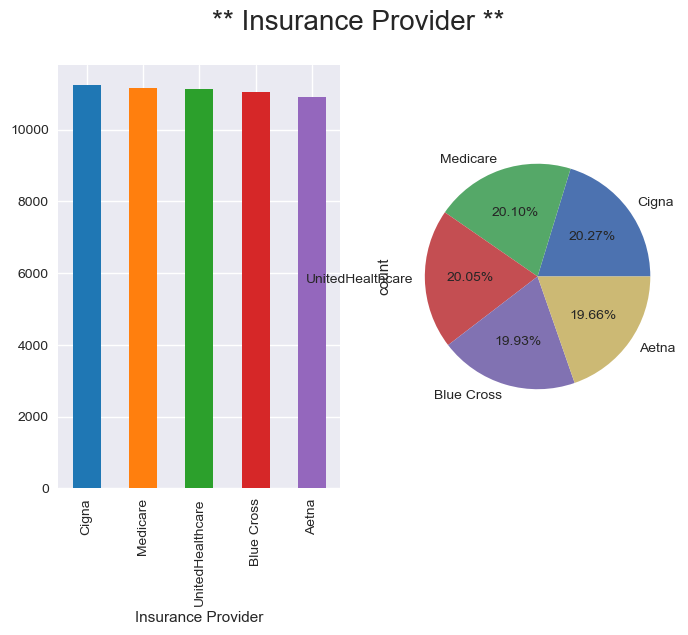

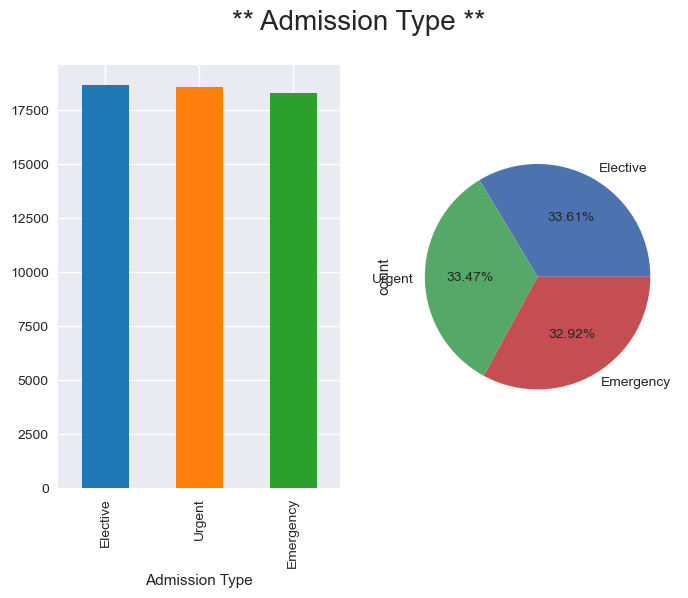

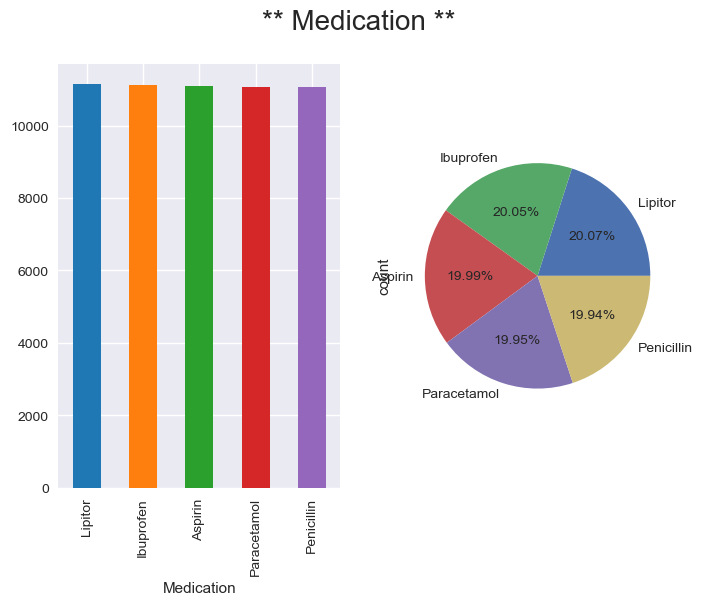

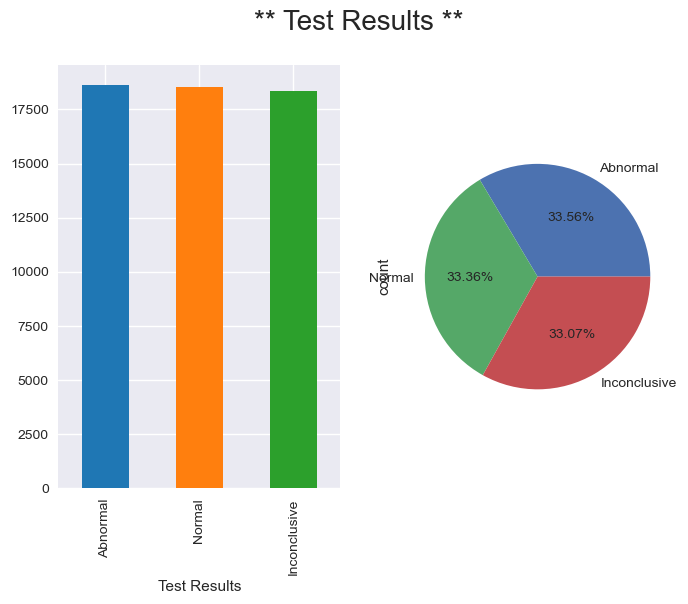

In [121]:
for i in cols:

  if i == 'Gender':

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** Gender **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        data['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        data['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()
    
  else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** ' + i + ' **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        data[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        data[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [122]:
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

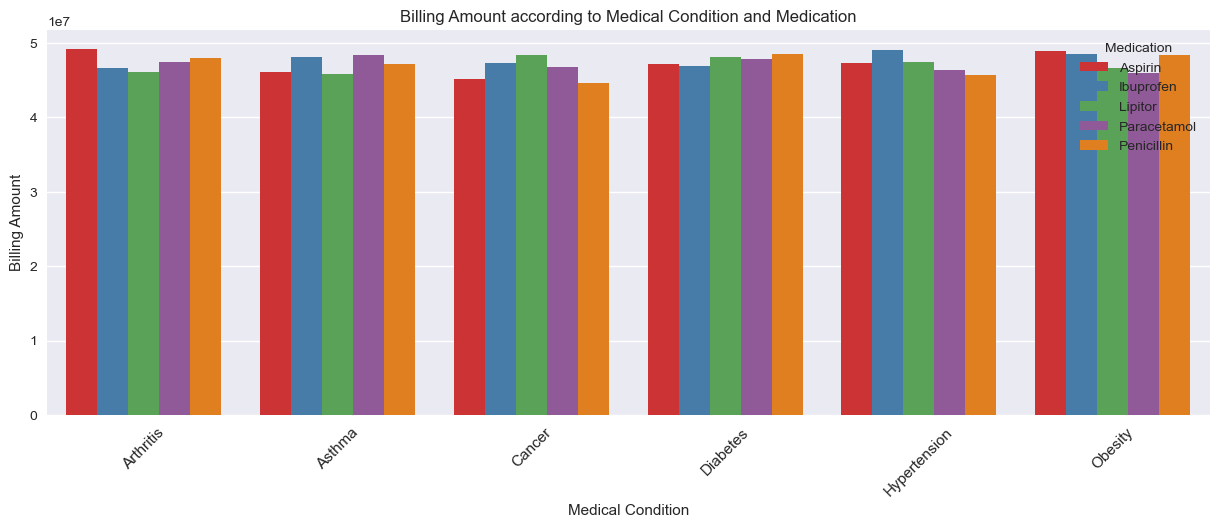

In [123]:
df_trans = data.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 11)
plt.show()

In [146]:
grouped_df = data.groupby(['Medication', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medication', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Medication Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Medication': 'Medication', 'Medical Condition': 'Medical Condition'})
fig.show()

In [149]:
grouped_df = data.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Admission Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [125]:
ts=data["Billing Amount"].resample('M').sum()

In [126]:
ts.head()

Discharge Date
2019-05-31     7157803
2019-06-30    22353647
2019-07-31    23665099
2019-08-31    24841410
2019-09-30    24980911
Freq: M, Name: Billing Amount, dtype: int32

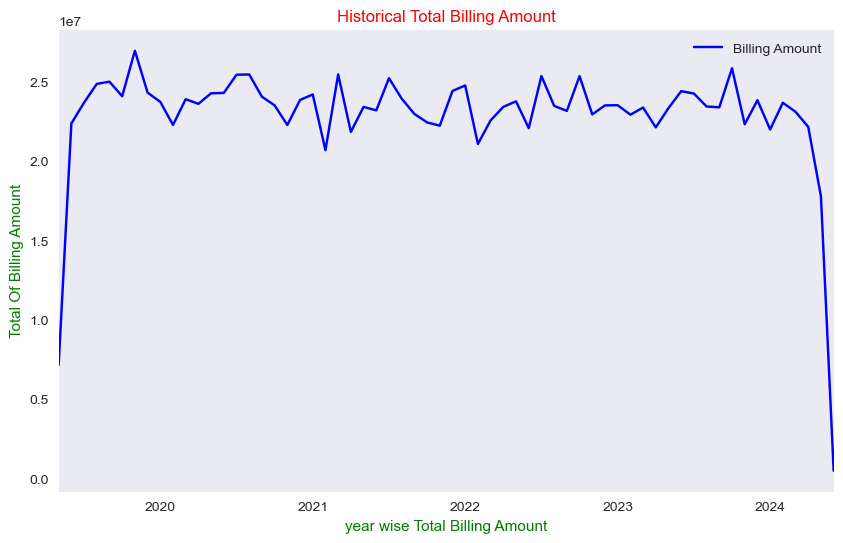

In [144]:
ts.plot(c='b',figsize=(10,6))
plt.grid()
plt.xlabel('year wise Total Billing Amount',c='g')
plt.ylabel('Total Of Billing Amount',c='g')
plt.title('Historical Total Billing Amount',c='r')
plt.legend()
plt.show()

In [128]:
len(ts)

62

In [129]:
train =ts[:64]

In [130]:
test =ts[64:]

In [131]:
from statsmodels.tsa.arima.model import ARIMA

In [132]:
model = ARIMA(train, order=(5,0,4))
model_fit = model.fit()
forecast = model_fit.predict(params=model_fit.params)

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
forecast_steps = 64

In [135]:
predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps - 1, typ='levels')

In [136]:
len(train),(len(ts)-1)

(62, 61)

In [137]:
final_model = ARIMA(ts,order=(5,0,4)).fit()

In [138]:
predictions = final_model.predict(len(ts),len(ts)+6)

In [139]:
predictions.sum()

126340162.18477958

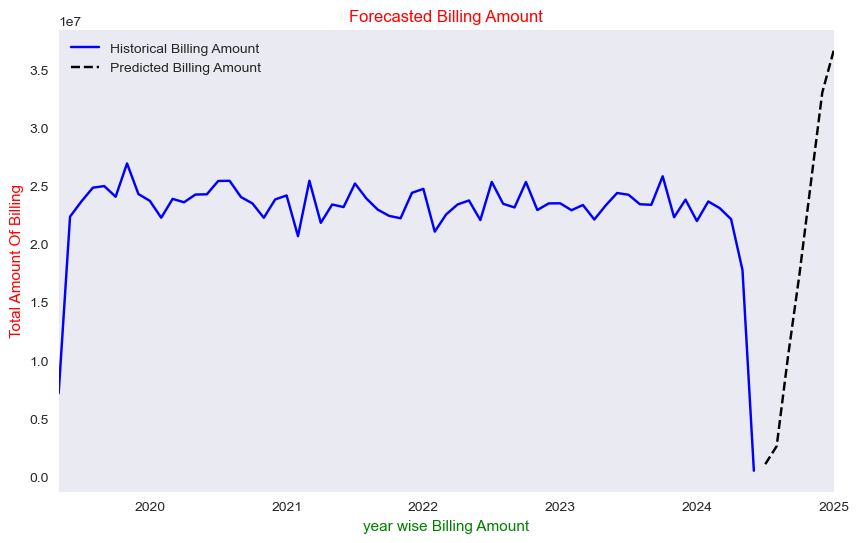

In [140]:
ts.plot(legend=True,label='Historical Billing Amount',c='b',figsize=(10,6))
predictions.plot(legend=True,label='Predicted Billing Amount',c='Black',ls='--')
plt.grid()
plt.ylabel('Total Amount Of Billing',c='r')
plt.xlabel('year wise Billing Amount',c='g')
plt.title('Forecasted Billing Amount',c='r')
plt.show()

In [141]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Billing Amount   No. Observations:                   62
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -1016.591
Date:                Thu, 19 Sep 2024   AIC                           2055.182
Time:                        12:11:09   BIC                           2078.581
Sample:                    05-31-2019   HQIC                          2064.369
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.286e+07   1.36e-06   1.68e+13      0.000    2.29e+07    2.29e+07
ar.L1          0.6351      0.815      0.779      0.436      -0.963       2.233
ar.L2          1.2784      0.160      7.996      0.0